<a href="https://colab.research.google.com/github/Pedro-hub13/Analysis-walmart-stores/blob/main/walmart_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving Walmart[1].csv to Walmart[1].csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import scale

##Primeiras Analises 

In [ ]:
df = pd.read_csv('Walmart[1].csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


sem valores nulos, e a tranformação da Data que está como object para Datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.duplicated().any()

False

sem valores duplicados também

##preço medio de venda semanal por loja

In [ ]:
df_mean_store = df.groupby('Store').Weekly_Sales.mean().sort_values(ascending=False)
df_mean_store.to_frame().style.format('{:,.2f}')

,Weekly_Sales
Store,
20,"2,107,676.87"
4,"2,094,712.96"
14,"2,020,978.40"
13,"2,003,620.31"
2,"1,925,751.34"
10,"1,899,424.57"
27,"1,775,216.20"
6,"1,564,728.19"
1,"1,555,264.40"


##Maior Correlação entre as variaveis com o numero de vendas

In [ ]:
df_corr = df.corr()
df.corr().loc['Weekly_Sales'].abs().sort_values(ascending = False)

Weekly_Sales    1.000000
Store           0.335332
Unemployment    0.106176
CPI             0.072634
Temperature     0.063810
Holiday_Flag    0.036891
Fuel_Price      0.009464
Name: Weekly_Sales, dtype: float64

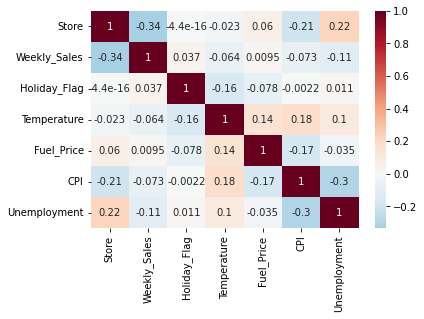

In [ ]:
sns.heatmap(df_corr, annot = True, center = 0, cmap = 'RdBu_r');

##Da loja com maior vendas, semanas do ano em que ultrapassou a média do período de vendas da propria loja

In [ ]:
target_store = df_mean_store.index[0]

In [ ]:
df_target = df.query('Store == @target_store')

In [ ]:
df_target_mean = df_target.Weekly_Sales.mean().round()

In [ ]:
(df_target['Weekly_Sales'] > df_target_mean).sum()

52

In [ ]:
media = (df_target['Weekly_Sales'] > df_target_mean).sum()/len(df_target)
print(media)

0.36363636363636365


In [ ]:
df_holiday = df.loc[df['Holiday_Flag'] == True]
df_holiday.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742


In [ ]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 1 to 6427
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         450 non-null    int64         
 1   Date          450 non-null    datetime64[ns]
 2   Weekly_Sales  450 non-null    float64       
 3   Holiday_Flag  450 non-null    int64         
 4   Temperature   450 non-null    float64       
 5   Fuel_Price    450 non-null    float64       
 6   CPI           450 non-null    float64       
 7   Unemployment  450 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 31.6 KB


In [ ]:
df_holiday_agg = df.groupby('Date')['Weekly_Sales'].agg(['min', 'max', 'mean'])

<AxesSubplot:xlabel='Date', ylabel='mean'>

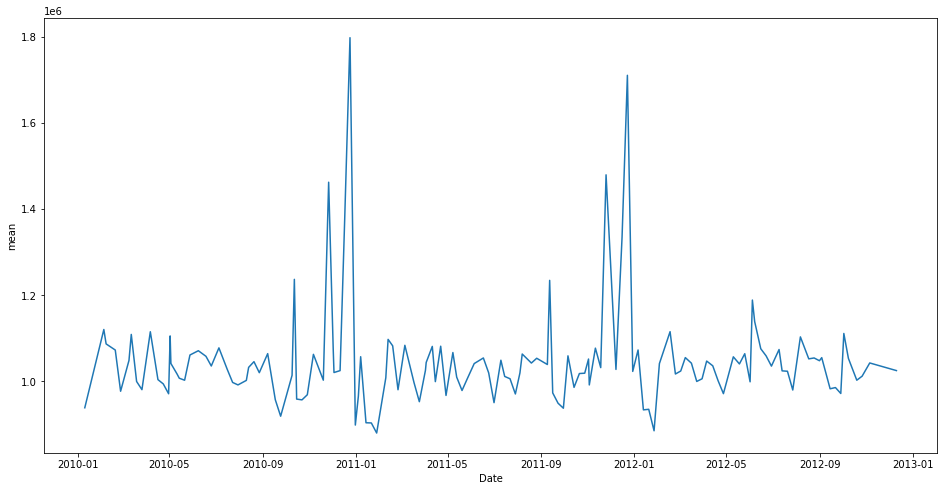

In [ ]:
plt.figure(figsize = (16,8))
sns.lineplot(data = df_holiday_agg, x = 'Date', y = 'mean')

##Pensando na expansão de lojas, eu escolheria essa

In [ ]:
df_sorted = df.sort_values(['Store','Date'])
df_sorted.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
